In [1]:
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold

In [2]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
from sklearn.model_selection import train_test_split


Bad key text.latex.preview in file /home/cherepaha/miniconda/envs/py37/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /home/cherepaha/miniconda/envs/py37/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file /home/cherepaha/miniconda/envs/py37/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # w

In [3]:
all_meta = pd.read_csv('data/train_metadata_extended.csv')
with open('data/scored_birds.json') as fin:
    test_birds = json.load(fin)

In [4]:
all_meta.loc[:, 'secondary_labels'] = all_meta.secondary_labels.apply(eval)
all_meta['target_raw'] = all_meta.secondary_labels + all_meta.primary_label.apply(lambda x: [x])

In [5]:
all_species = sorted(set(all_meta.target_raw.sum()))
species2id = {s: i for i, s in enumerate(all_species)}
id2species = {i: s for i, s in enumerate(all_species)}

all_meta['target'] = all_meta.target_raw.apply(lambda species: [int(s in species) for s in all_species])

In [6]:
# kfold = MultilabelStratifiedKFold(n_splits=5, random_state=42, shuffle=True)

# for train_index, test_index in kfold.split(all_meta, all_target):
#     break
# train_meta = all_meta.iloc[train_index]
# val_meta = all_meta.iloc[test_index]

In [32]:
train_meta, val_meta = train_test_split(
    all_meta,
    test_size=0.2,
    random_state=42,
#     stratify=all_target[:, all_target.sum(axis=0) >= 100]
)
bigduration_meta = train_meta[train_meta.duration > 180]
smallduration_meta = train_meta[train_meta.duration <= 180]

In [33]:
train_target = np.array([t for t in train_meta.target])
val_target = np.array([t for t in val_meta.target])
all_target = np.array([t for t in all_meta.target])
bigdur_target = np.array([t for t in bigduration_meta.target])
smalldur_target = np.array([t for t in smallduration_meta.target])

In [34]:
def count_stat(meta, target):
    proportion = target.mean(axis=0)
    duration = (meta.duration.values[:, None] * target).mean(axis=0, where=target.astype(bool))
    neighbours_count = (target.sum(axis=1)[:, None] * target).mean(axis=0, where=target.astype(bool))
    rating = (meta.rating.values[:, None] * target).mean(axis=0, where=target.astype(bool))
    target_bird = [b in test_birds for b in all_species]
    
    birds_stat = pd.DataFrame({
        'bird': all_species, 
        'proportion': proportion,
        'duration': duration,
        'neighbours_count': neighbours_count,
        'rating': rating,
        'is_target': target_bird
    })
    birds_stat.set_index('bird', inplace=True)
    return birds_stat

In [35]:
train_stat = count_stat(train_meta, train_target)
val_stat = count_stat(val_meta, val_target)
all_stat = count_stat(all_meta, all_target)
bigdur_stat = count_stat(bigduration_meta, bigdur_target)
smalldur_stat = count_stat(smallduration_meta, smalldur_target)

/home/cherepaha/miniconda/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/cherepaha/miniconda/envs/py37/lib/python3.7/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/home/cherepaha/miniconda/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice.
  after removing the cwd from sys.path.
/home/cherepaha/miniconda/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice.
  """


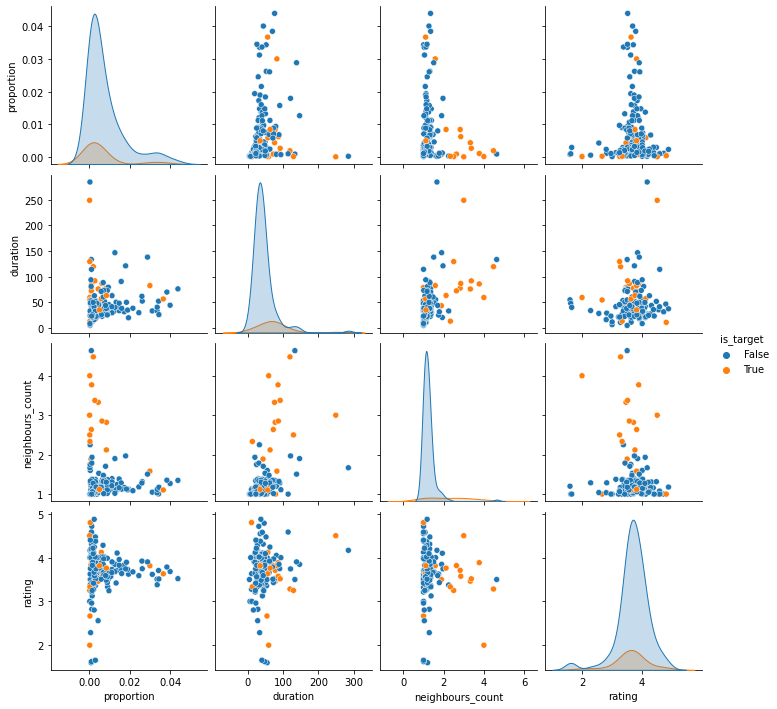

In [11]:
sns.pairplot(
    train_stat,
    hue='is_target'
)

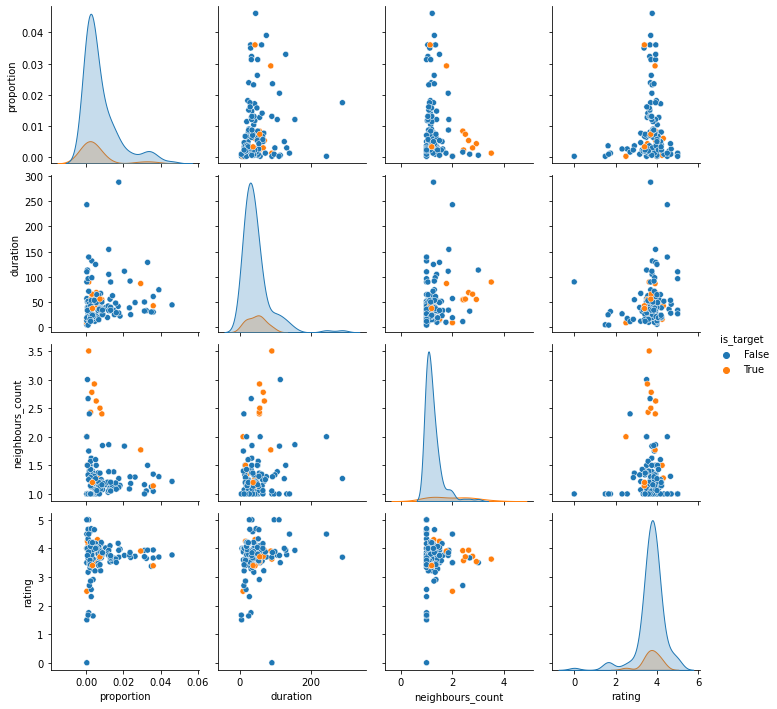

In [12]:
sns.pairplot(
    val_stat,
    hue='is_target'
)

In [18]:
train_stat[train_stat.neighbours_count == 1]

,proportion,duration,neighbours_count,rating,is_target
bird,,,,,
barpet,0.001010,79.000000,1.0,3.458333,True
brnboo,0.000926,35.454545,1.0,4.545455,False
bubsan,0.000337,5.000000,1.0,3.500000,False
bulpet,0.000589,46.714286,1.0,4.785714,False
burpar,0.001178,31.642857,1.0,4.714286,False
chbsan,0.001178,19.571429,1.0,3.321429,False
chukar,0.002778,36.060606,1.0,3.545455,False
coopet,0.000253,6.666667,1.0,3.000000,False
ercfra,0.000421,11.000000,1.0,4.800000,True


In [13]:
train_stat[train_stat.is_target]

,proportion,duration,neighbours_count,rating,is_target
bird,,,,,
akiapo,0.001094,85.923077,3.769231,3.884615,True
aniani,0.000758,43.444444,1.888889,3.500000,True
apapan,0.008417,77.720000,2.820000,3.710000,True
barpet,0.001010,79.000000,1.000000,3.458333,True
crehon,0.000168,59.500000,4.000000,2.000000,True
elepai,0.000926,72.454545,2.636364,3.818182,True
ercfra,0.000421,11.000000,1.000000,4.800000,True
hawama,0.004377,76.057692,3.326923,3.461538,True
hawcre,0.001936,119.565217,4.478261,3.282609,True


In [36]:
val_stat[val_stat.is_target]

,proportion,duration,neighbours_count,rating,is_target
bird,,,,,
akiapo,0.001346,89.750000,3.500000,3.625000,True
aniani,0.002020,19.666667,1.333333,3.666667,True
apapan,0.008415,54.880000,2.400000,3.920000,True
barpet,0.001010,21.666667,1.000000,4.166667,True
crehon,0.000000,NaN,NaN,NaN,True
elepai,0.002356,54.571429,2.428571,3.571429,True
ercfra,0.000337,16.000000,1.000000,4.000000,True
hawama,0.004376,55.230769,2.923077,3.538462,True
hawcre,0.000000,NaN,NaN,NaN,True


In [37]:
all_stat[all_stat.is_target].sort_values('proportion')

,proportion,duration,neighbours_count,rating,is_target
bird,,,,,
maupar,0.000067,249.000000,3.000000,4.500000,True
crehon,0.000135,59.500000,4.000000,2.000000,True
hawhaw,0.000202,89.333333,2.333333,3.000000,True
puaioh,0.000202,13.333333,2.333333,3.333333,True
hawpet1,0.000202,54.666667,1.000000,2.666667,True
ercfra,0.000404,11.833333,1.000000,4.666667,True
hawgoo,0.000741,23.090909,1.272727,3.909091,True
aniani,0.001010,33.933333,1.666667,3.566667,True
barpet,0.001010,67.533333,1.000000,3.600000,True


In [38]:
bigdur_stat[bigdur_stat.is_target]

,proportion,duration,neighbours_count,rating,is_target
bird,,,,,
akiapo,0.004819,290.000000,6.000000,4.000000,True
aniani,0.000000,NaN,NaN,NaN,True
apapan,0.019277,302.625000,4.750000,3.750000,True
barpet,0.004819,271.000000,1.000000,4.500000,True
crehon,0.000000,NaN,NaN,NaN,True
elepai,0.002410,203.000000,6.000000,3.500000,True
ercfra,0.000000,NaN,NaN,NaN,True
hawama,0.009639,368.000000,5.500000,3.750000,True
hawcre,0.012048,308.200000,5.000000,3.500000,True


In [39]:
smalldur_stat[smalldur_stat.is_target]

,proportion,duration,neighbours_count,rating,is_target
bird,,,,,
akiapo,0.000959,48.818182,3.363636,3.863636,True
aniani,0.000785,43.444444,1.888889,3.500000,True
apapan,0.008024,58.163043,2.652174,3.706522,True
barpet,0.000872,40.600000,1.000000,3.250000,True
crehon,0.000174,59.500000,4.000000,2.000000,True
elepai,0.000872,59.400000,2.300000,3.850000,True
ercfra,0.000436,11.000000,1.000000,4.800000,True
hawama,0.004186,51.729167,3.145833,3.437500,True
hawcre,0.001570,67.166667,4.333333,3.222222,True


In [40]:
smallduration_meta.shape

(11466, 16)

In [25]:
all_meta[all_meta.target_raw.apply(len) == 1][['rating', 'duration']].describe()

,rating,duration
count,13374.000000,13374.000000
mean,3.732877,40.768581
std,1.201598,87.672648
min,0.000000,0.000000
25%,3.000000,10.000000
50%,4.000000,21.000000
75%,4.500000,44.000000
max,5.000000,4486.000000
